# Decision Trees - ID3, CART, Random Forest & XGBoost

BITS F464 Assignment 2

### Importing and Installing Dependencies

In [3]:
# !poetry add pandas
# !poetry add numpy
# !poetry add matplotlib
# !poetry add seaborn
# !poetry add scikit-learn
# !poetry add tensorflow
# !poetry add keras
# !poetry add tensorflow_decision_forests

# Uncomment if ur using pip instead
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install tensorflow
# %pip install keras
# %pip install tensorflow_decision_forests

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [5]:
df1 = pd.read_csv('./data/221.csv')
df2 = pd.read_csv('./data/230.csv')

In [6]:
df1.head()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
0,28,81,120,98,74,73,0
1,29,81,120,98,74,73,0
2,30,81,120,98,74,73,0
3,30,81,120,99,74,73,0
4,29,81,120,99,73,73,0


In [7]:
df2.head()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
0,15,54,73,97,72,71,0
1,15,54,73,97,72,71,0
2,15,54,73,97,72,71,0
3,15,54,73,97,72,71,0
4,15,55,74,97,72,71,0


### Data Preprocessing

In [8]:
print(f"Patient 1 Shape: {df1.shape}")
print(f"Patient 2 Shape: {df2.shape}")

Patient 1 Shape: (24999, 7)
Patient 2 Shape: (25000, 7)


In [9]:
df1.describe()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
count,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,23.763951,83.889756,121.411656,99.041282,88.562342,87.975439,0.065683
std,4.492832,4.746617,8.966590,1.304528,9.592311,9.219837,0.247731
min,0.000000,66.000000,88.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,81.000000,114.000000,98.000000,81.000000,81.000000,0.000000
50%,23.000000,83.000000,121.000000,99.000000,88.000000,88.000000,0.000000
75%,26.000000,87.000000,129.000000,100.000000,95.000000,95.000000,0.000000
max,42.000000,127.000000,170.000000,100.000000,120.000000,119.000000,1.000000


In [10]:
df2.describe()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,17.621400,53.966440,73.920600,94.526280,77.004120,76.180320,0.031480
std,3.560338,7.752623,10.038658,2.137993,6.611137,5.954691,0.174615
min,0.000000,37.000000,52.000000,81.000000,0.000000,54.000000,0.000000
25%,15.000000,50.000000,67.000000,93.000000,73.000000,72.000000,0.000000
50%,17.000000,54.000000,73.000000,94.000000,76.000000,75.000000,0.000000
75%,20.000000,60.000000,82.000000,96.000000,79.000000,79.000000,0.000000
max,42.000000,211.000000,217.000000,99.000000,131.000000,128.000000,1.000000


In [18]:
print(f"Categorical Columns: {df1.select_dtypes(include=['object']).columns}")
print(f"Numerical Columns: {df1.select_dtypes(include=['number']).columns}")

Categorical Columns: Index([], dtype='object')
Numerical Columns: Index(['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE', 'Anomaly'], dtype='object')


In [19]:
print(f"Categorical Columns: {df2.select_dtypes(include=['object']).columns}")
print(f"Numerical Columns: {df2.select_dtypes(include=['number']).columns}")

Categorical Columns: Index([], dtype='object')
Numerical Columns: Index(['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE', 'Anomaly'], dtype='object')


#### Missing Values

In [12]:
print(f"Patient 1 Duplicate Count: {df1.duplicated().sum()}")

df1.isnull().sum()

Patient 1 Duplicate Count: 9445


RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64

In [13]:
print(f"Patient 2 Duplicate Count: {df2.duplicated().sum()}")

df2.isnull().sum()

Patient 2 Duplicate Count: 16551


RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64

- No Missing Values in both Patient 1 and 2

#### Visualizing Numerical Features

In [41]:
def visualize_numerical(df):
    num_cols = df.select_dtypes(include=['number']).columns
    num_plots = len(num_cols)
    num_rows = (num_plots // 3) + (num_plots % 3 > 0) 
    fig, ax = plt.subplots(num_rows, 3, figsize=(16, 5*num_rows))
    for i, feature in enumerate(num_cols):
        row = i // 3
        col = i % 3
        sns.histplot(data=df, x=feature, ax=ax[row, col], kde=True)
        ax[row, col].set_title(f'Distribution of {feature}')
    plt.tight_layout()

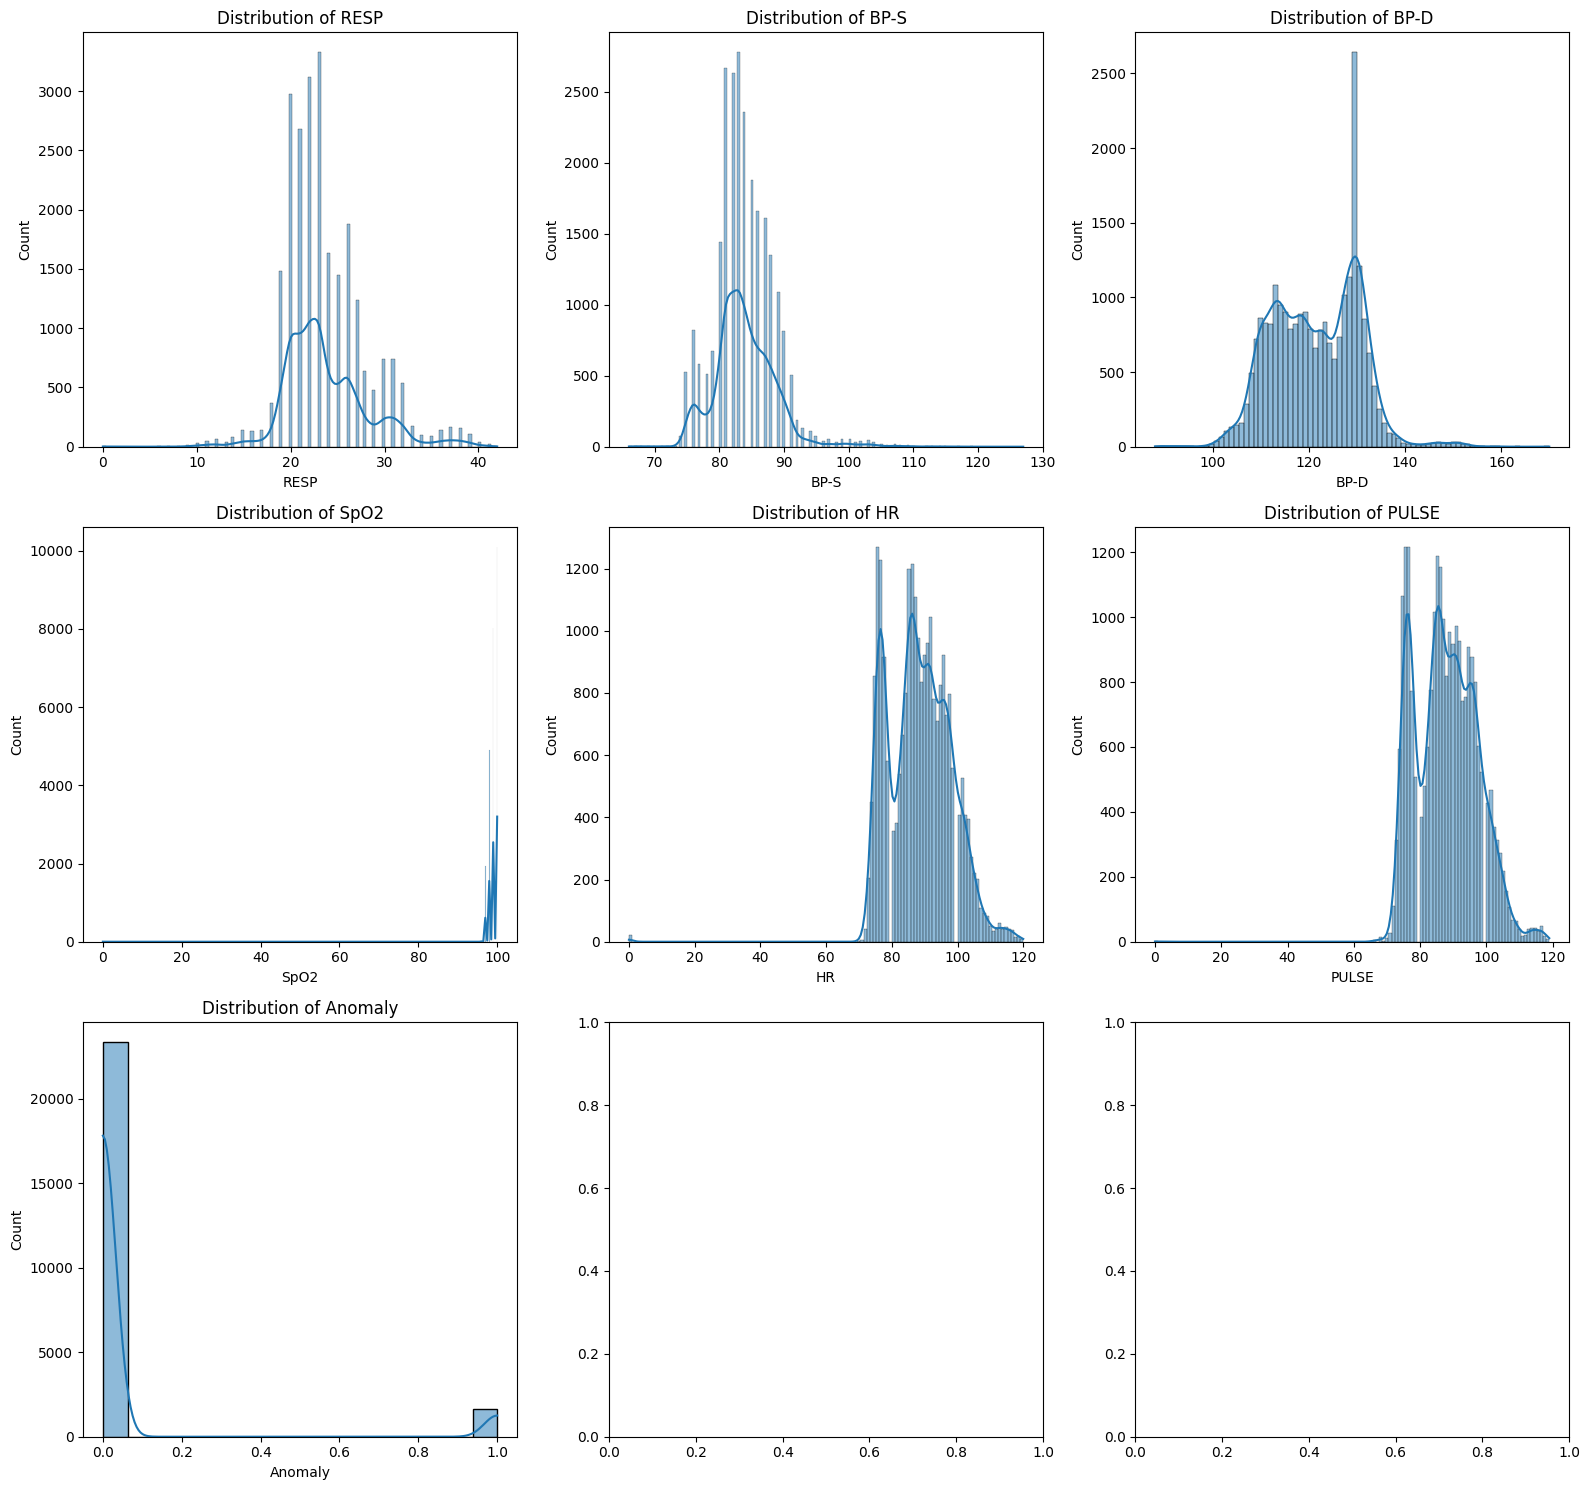

In [42]:
visualize_numerical(df1)

For Patient 1 - 
- We need to sample Anomaly to prevent bias

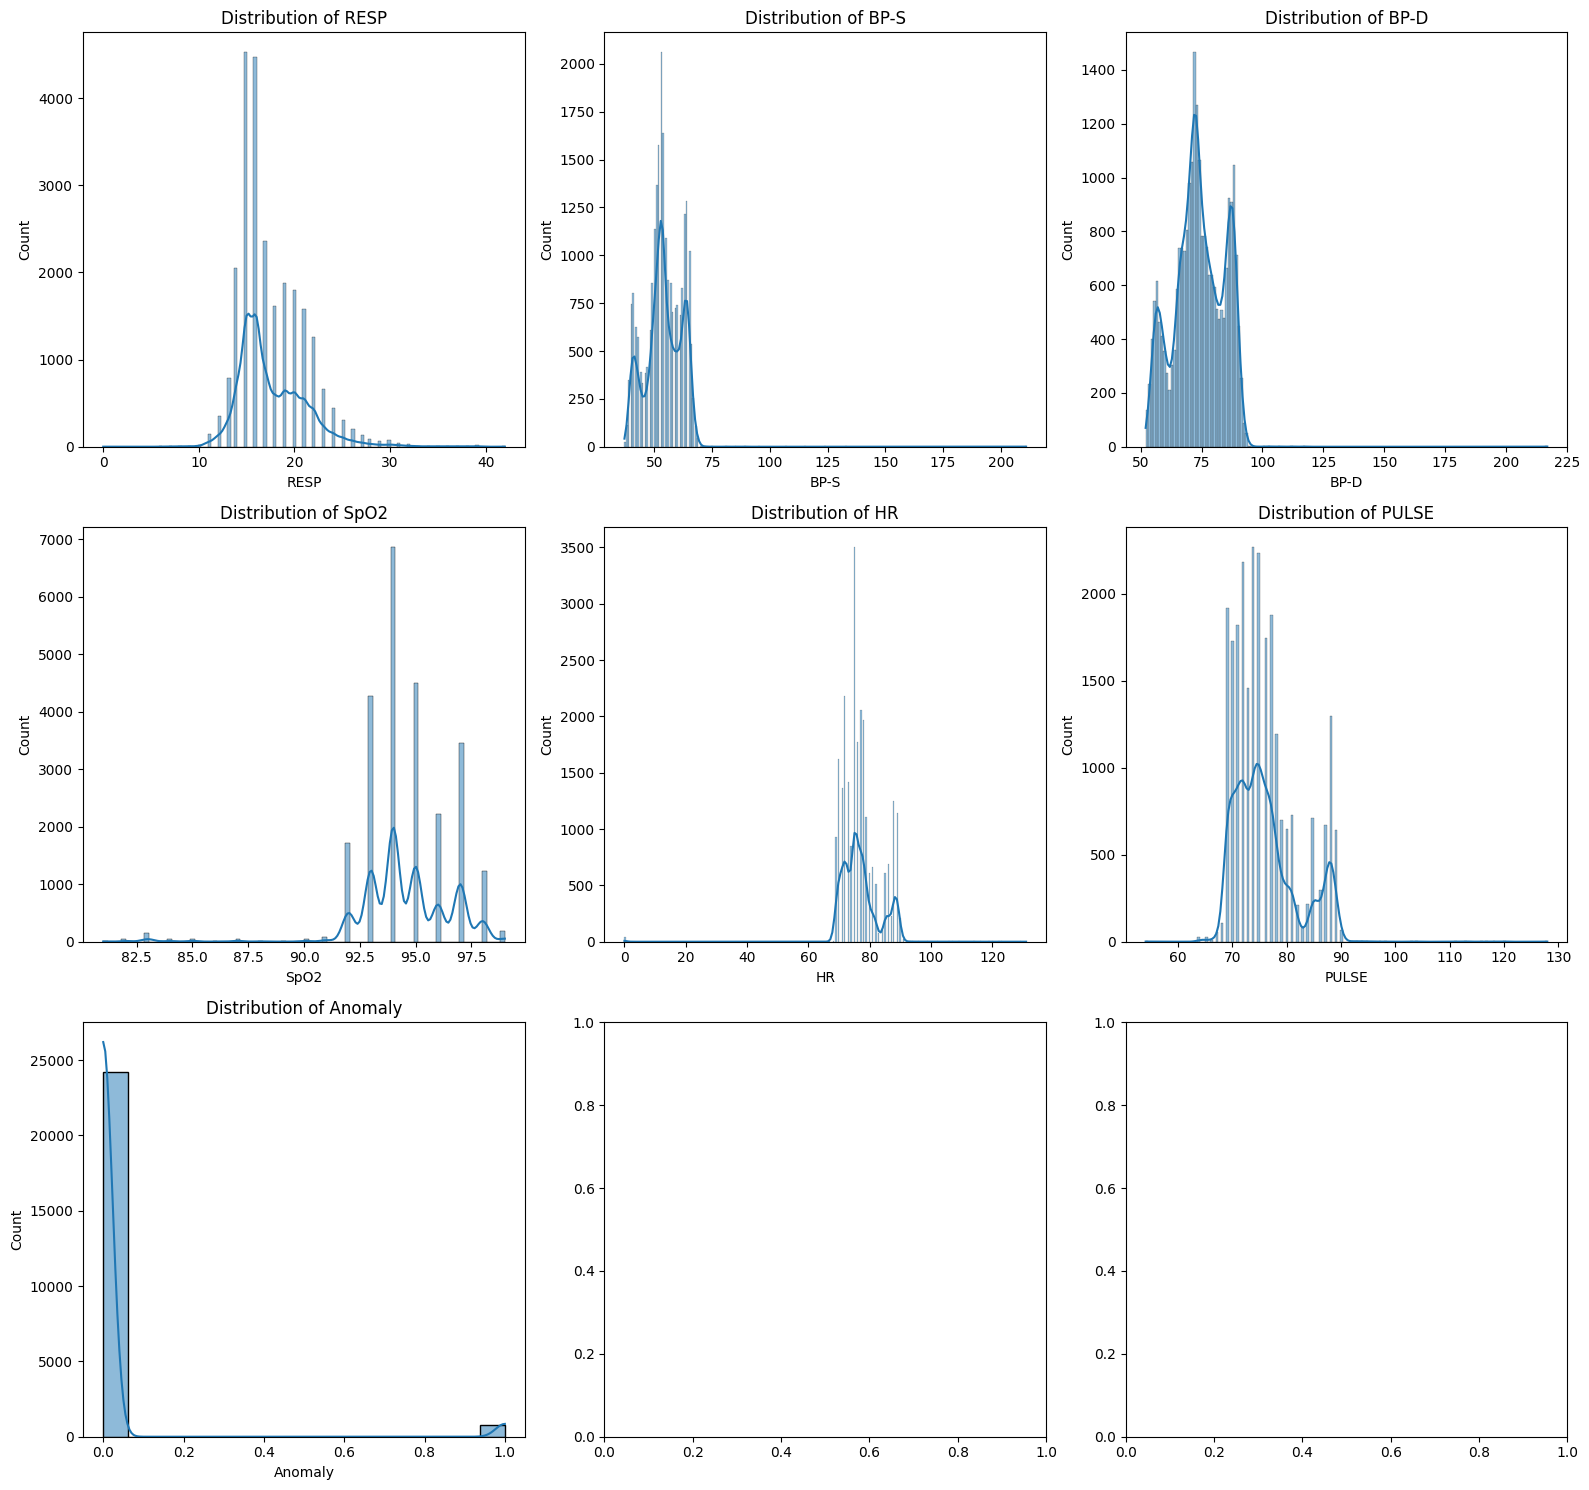

In [43]:
visualize_numerical(df2)

For Patient 2 - 
- We need to sample Anomaly to prevent bias

##### Correlation Matrix

In [75]:
def visualize_correlation(df):
    fig,ax=plt.subplots(figsize=(12,8))

    num_features=df.select_dtypes(include='number')
    sns.heatmap(num_features.corr(),annot=True,ax=ax, cmap='BuPu')
    plt.show()

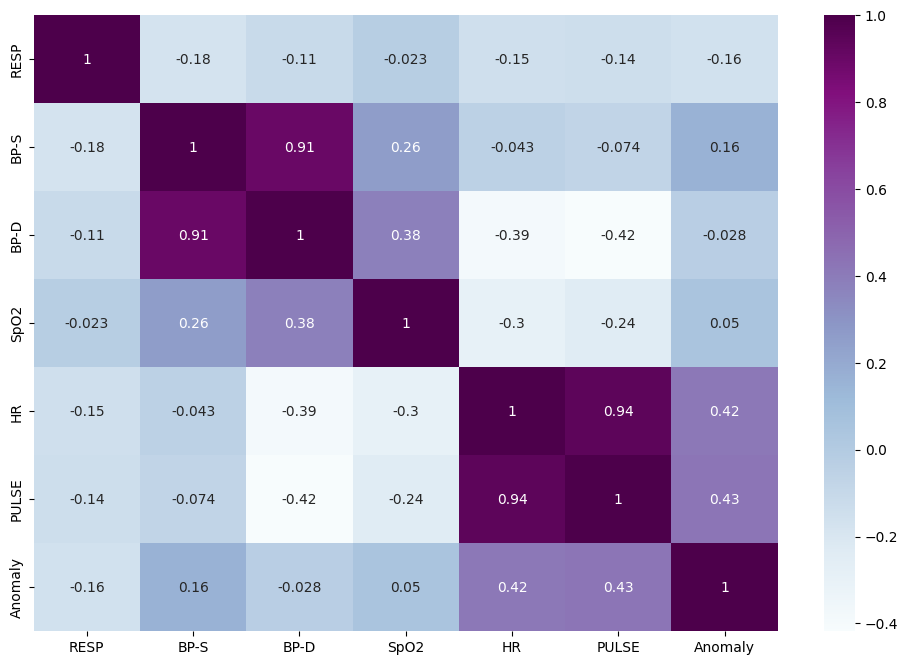

In [76]:
visualize_correlation(df1)

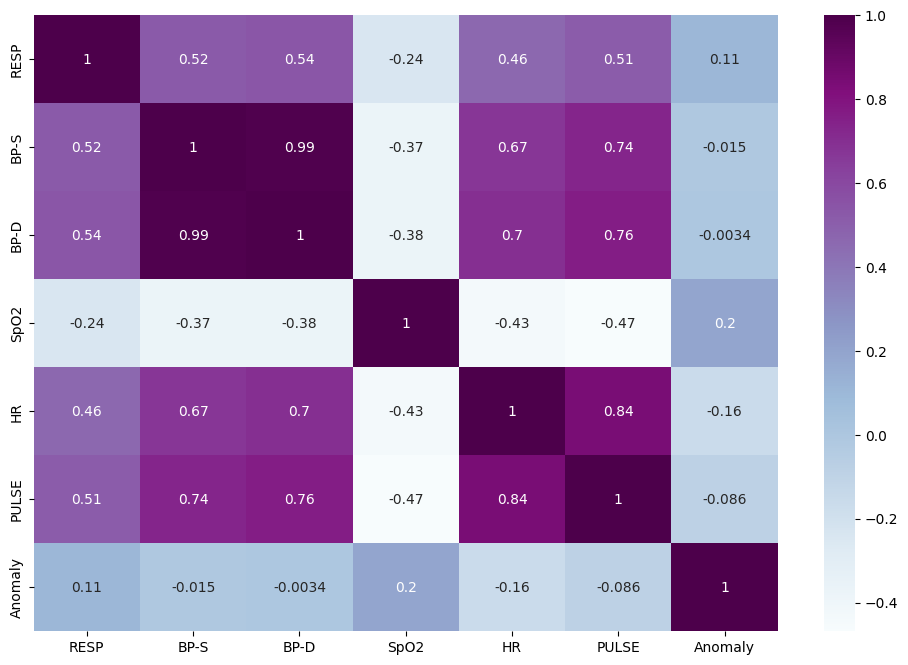

In [77]:
visualize_correlation(df2)

For Patient 1 - 
- HR and PULSE have the highest correlation

For Patient 2 - 
- SPO2 has significant correlation

#### SMOTE

Since number of 0s dominates 1s in Anomaly, we can use SMOTE to achieve an equal distribution of 1s and 0s to help prevent bias in the model

In [58]:
from sklearn.model_selection import train_test_split

def split_data(df,outcome):
    X = df.drop(outcome, axis=1)
    y = df[outcome]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=106)
    return X_train, X_test, y_train, y_test

In [66]:
from imblearn.over_sampling import SMOTE

def smote_data(df,outcome):
    X_train, X_test, y_train, y_test = split_data(df,outcome)
    smote = SMOTE(random_state=106)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    return X_train_smote, X_test, y_train_smote, y_test

### ID3 Implementation